In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

## 1. Loading and Saving Images

In [2]:
os.getcwd()


'D:\\free_softwares\\computer_vision_basics\\Exercises'

In [3]:
%%bash
ls ../img

basic_shapes.png
beach.png
bricks.png
coding.png
dog_muffin.jpg
dotted_i.png
landscape.jpg
lego.jpg
licence_plate_raw.png
license_plate.png
opencv_logo.png
seal.png
shapes.png
snowy_i.png
tetris_blocks.png
tictactoe.png
tree.jpg


In [4]:
# Accessing and Modifying pixel values
# loads an image
image = cv2.imread('../img/coding.png') # OpenCV reads images in as B, G, R 
image = np.flip(image, axis = 2) # to Re-order channels as R, G, B for matplotlib renderer
# It returns a tuple of number of rows, columns and channels (if image is color)
image.shape

(344, 640, 3)

In [5]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

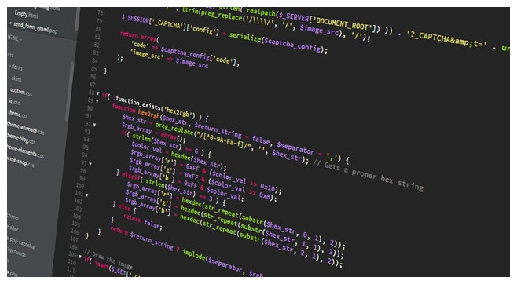

In [6]:
show_image(image, fig_size=(9,9))

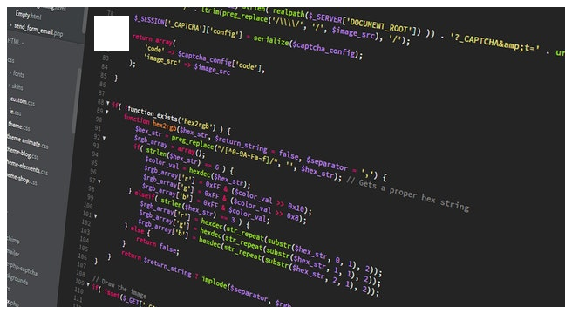

In [7]:
# accessing image section and converting it to white
image[10:50, 100:140] = [255, 255, 255]
show_image(image)

In [8]:
#in matplotlib there is a similar function
# plt.imread() wouldnt do image conversion thou

In [9]:
cv2.imwrite('edited.png', np.flip(image, axis = 2)) # Remember OpenCV operations expect images to be in the format # B, G, R

True

### EXERCISE: Load an image using CV2 and use `show_image()` function to show it

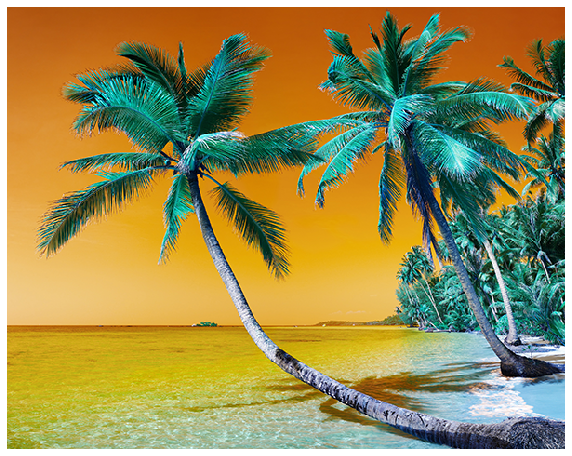

In [10]:
# TODO: What happens if we don't flip the image channels before showing it using matplotlib?
image_beach = cv2.imread('../img/beach.png') # OpenCV reads images in as B, G, R 
show_image(image_beach)

### EXERCISE: Load an image using CV2, draw a white rectangle on it then save it to disk using CV2

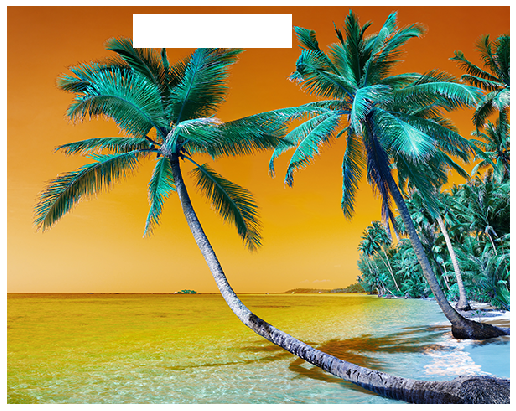

True

In [11]:
# TODO: Write your code below
image_beach[10:50, 150:340] = [255, 255, 255]
show_image(image_beach, fig_size=(9,9))
cv2.imwrite('beach_edited.png', np.flip(image_beach, axis = 2)) # Remember OpenCV operations expect images to be in the format # B, G, R

## 2. Colour Channels

### 2.1 Order of Colour Channels

In [12]:
shapes_image = "../img/shapes.png"

In [13]:
# reads image using matplotlib
shapes_matpotlib = plt.imread(shapes_image) #R,G,B

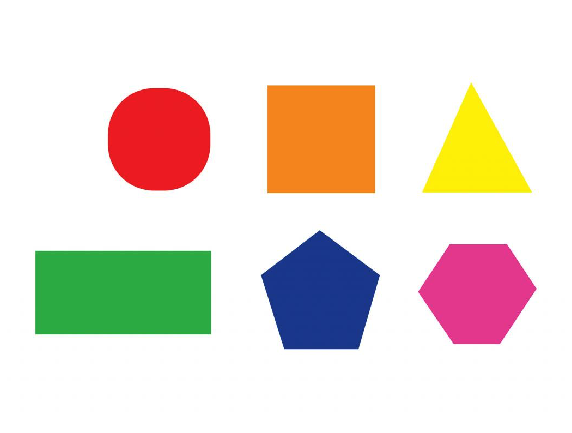

In [14]:
show_image(shapes_matpotlib)

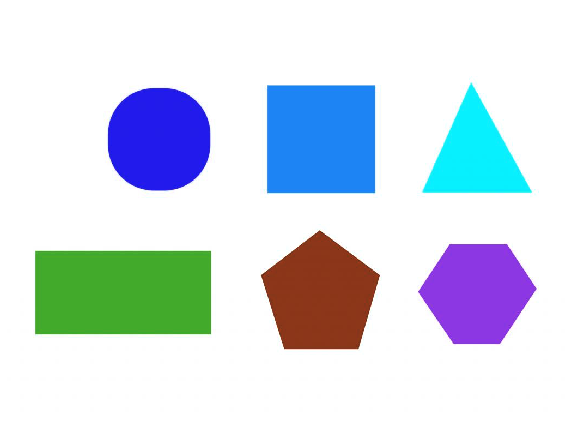

In [15]:
# The order of colour channels read in is important - Notice the colour changes
shapes_cv2 = cv2.imread(shapes_image)
show_image(shapes_cv2)

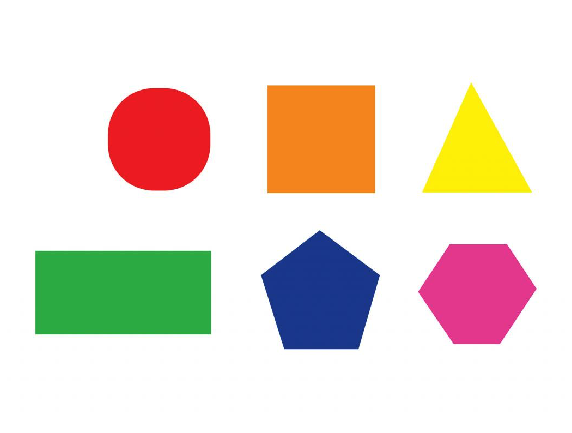

In [16]:
show_image(np.flip(shapes_cv2, axis = 2))

### 2.2 Flipping matrices with numpy

In [17]:
x = np.array([[[1,2, 3], [2, 3, 4], [3, 4, 5]], 
                  [[1,2, 3], [2, 3, 4], [3, 4, 6]], 
                  [[1,2, 3], [2, 3, 4], [3, 4, 7]]])
x, x.shape

(array([[[1, 2, 3],
         [2, 3, 4],
         [3, 4, 5]],
 
        [[1, 2, 3],
         [2, 3, 4],
         [3, 4, 6]],
 
        [[1, 2, 3],
         [2, 3, 4],
         [3, 4, 7]]]),
 (3, 3, 3))

In [18]:
np.flip(x, axis =0 )

array([[[1, 2, 3],
        [2, 3, 4],
        [3, 4, 7]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 6]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]]])

In [19]:
np.flip(x, axis =1 )

array([[[3, 4, 5],
        [2, 3, 4],
        [1, 2, 3]],

       [[3, 4, 6],
        [2, 3, 4],
        [1, 2, 3]],

       [[3, 4, 7],
        [2, 3, 4],
        [1, 2, 3]]])

In [20]:
np.flip(x, axis =2 )

array([[[3, 2, 1],
        [4, 3, 2],
        [5, 4, 3]],

       [[3, 2, 1],
        [4, 3, 2],
        [6, 4, 3]],

       [[3, 2, 1],
        [4, 3, 2],
        [7, 4, 3]]])

### 2.3 Splitting colour channels with matplotlib

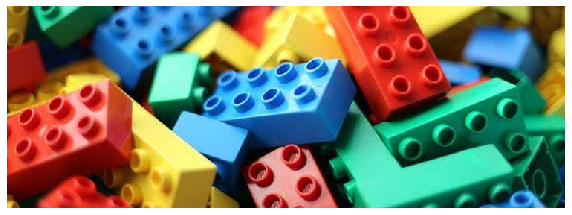

Red


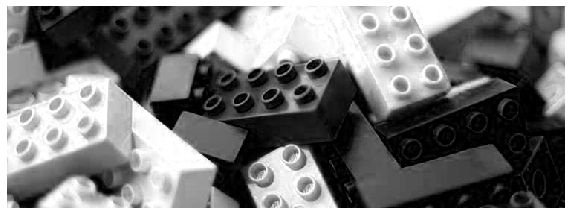

Green


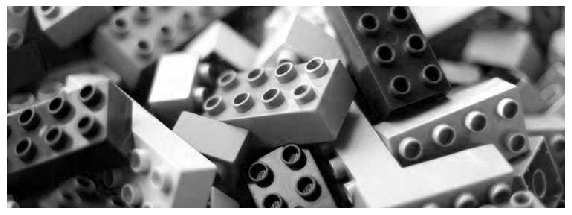

Blue


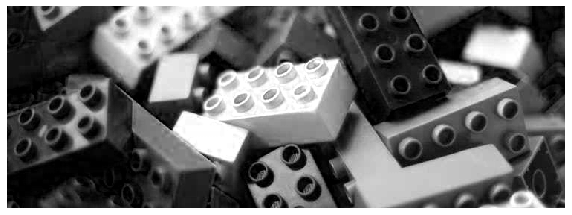

In [21]:
image = plt.imread('../img/lego.jpg')
show_image(image)
channels_matplotlib = [image[:, : , i] for i in range(3)]
names = ['Red', 'Green', 'Blue']
for name, channel in zip(names, channels_matplotlib):
    print(name)
    show_image(channel, cmap='gray')
    #print(channels_matplotlib)

### 2.4 Splitting colour channels with CV2

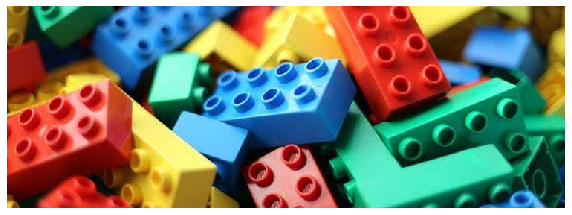

Red


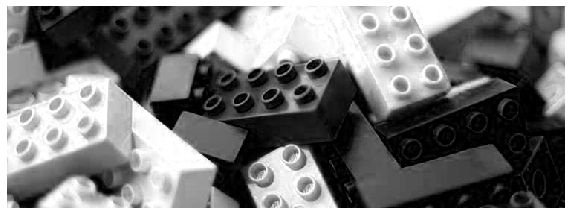

[[175 198 210 ...  78  95 107]
 [171 192 204 ...  86 103 115]
 [165 184 197 ...  95 112 121]
 ...
 [223 235 243 ...   0   0   0]
 [224 233 241 ...   8   2   0]
 [226 234 241 ...  23  16   9]]
Green


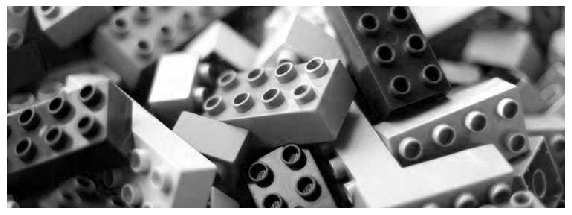

[[144 167 178 ...  47  64  76]
 [140 161 172 ...  55  72  85]
 [133 152 164 ...  64  81  91]
 ...
 [201 210 215 ...   7   8  10]
 [198 207 211 ...  11  14  14]
 [198 206 207 ...  21  22  24]]
Blue


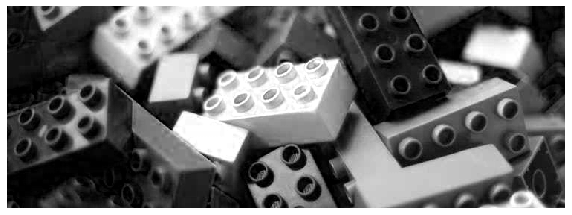

[[ 2 27 41 ...  0  7 19]
 [ 0 21 37 ...  1 15 25]
 [ 0 15 31 ...  9 24 31]
 ...
 [53 65 72 ... 19 21 23]
 [59 68 77 ... 30 30 30]
 [65 73 81 ... 45 44 43]]


In [22]:
image = cv2.imread('../img/lego.jpg') # B, G, R -> this order is required for showing images with cv2.imshow().
image = np.flip(image, axis = 2) # R, G, B -> This order is required for showing images with plt.imshow().
show_image(image)
cv2_channels = cv2.split(image)
for name, channel in zip(names, cv2_channels):
    print(name)
    show_image(channel, cmap='gray')
    print(channel)

### EXERCISE: Write a script that uses argument parser to load, crop and display an image with CV2 then saves it into a file

In [ ]:
# Your code below

import argparse
import cv2
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline

# Construct the argument parser and parse the arguments
ap = argparse.ArgumentParse()
ap.add_argument('-i', '--image', required=True, help='Path to the image')
ap.add_argument('-o', '--output', required=False, help='Path to saving the image')
args = vars(ap.parse_args())


image = cv2.imread(args['image'])

win_name1 = 'Original'
cv2.imshow(win_name1, image)
cv2.waitKey(0) #waitKey(0) will display the window infinitely until any keypress (suitable for image display)
    
#crop the image by slicing the matrix
y1 = 10
y2 = 500
x1 = 10
x2 = 500

image_crop = image[y1:y2, x1:x2]
win_name2 = 'cropped'
cv2.imshow(win_name2, image_crop)
cv2.waitKey(0)

cv2.imwrite(f'{args['output']}/img_cropped.png', image_crop)
#Doesn't seem to need to care about this here:
#Remember OpenCV operations expect images to be in the format # B, G, R



In [ ]:
#Solutions
%load ../solutions/parsing_commands.py



### Homework 1: Write a function that reads in an image using either the matplotlib or CV2 and shows it in this notebook using matplotlib 

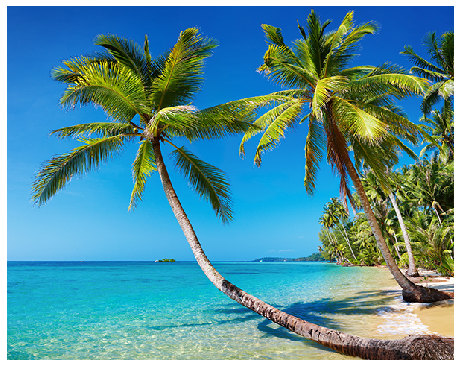

In [23]:
# TODO: Write your code below

def image_edit(img_link, cmap=None, fig_size=(8,8)):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # loads an image
    image = cv2.imread(img_link)
    image = np.flip(image, axis=2)
    
    # show the image
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap=cmap)
    ax.axis('off')
        
    return plt.show()
    # Remember OpenCV operations expect images to be in the format # B, G, R

image_edit('../img/beach.png')  



In [ ]:
# a more complex function that incorporates image cropping 
#def image_edit(img_link, x1 = 0, x2 = 500, y1 = 0, y2 = 500,
#               cmap=None, fig_size=(5,5)):
#    import cv2
#    import numpy as np
#    import matplotlib.pyplot as plt
#    %matplotlib inline
#    
#    # loads an image
#    image = cv2.imread(img_link)
#    image = np.flip(image, axis=2)
#    
#    image_crop = image[y1:y2, x1:x2]
#    
#    fig, ax = plt.subplots(figsize=fig_size)
#    ax.imshow(image_crop, cmap=cmap)
#    ax.axis('off')
#    plt.show()
#    
#    return cv2.imwrite('img_edited.png', np.flip(image_crop, axis=2))
#    # Remember OpenCV operations expect images to be in the format # B, G, R
#
#image_edit('../img/beach.png')  